# HEALTH INSURANCE REPORT

### By: Quan Le, Anirudh Chaudhary, Hao Nguyen

#### Columns
    1. age : age of policyholder 
    2. sex: gender of policy holder (female=0, male=1) 
    3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative 
            to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 
            18.5 to 25 
    4. children: number of children / dependents of policyholder 
    5. smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
    6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 
    7. charges: individual medical costs billed by health insurance 
    8. insuranceclaim:(yes=1, no=0)
    
#### Link: https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset


# 1. Get Relevant Data Sets

In [1]:
#Import all packages needed for Data set
import numpy as np
import pandas as pd

#Parse csv file to a data frame
insurance_table = pd.io.parsers.read_csv("~/Desktop/Project/insurance_claim.csv")
df_table = pd.DataFrame(insurance_table)

# 2. Cleansing Data and Transformation

In [2]:
#Find number of record
count_record = len(df_table.index)
count_record

1338

In [3]:
#remove duplication
df_table.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [4]:
#Check for missing data
df_table.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [5]:
#Transform Dummy Variable Region
df_table['isNorthEast'] = np.where(df_table['region'] == 0,1,0) #np.where(condition,x,y) for condition where true yield x as yield y
df_table['isNorthWest'] = np.where(df_table['region'] == 1,1,0)
df_table['isSouthEast'] = np.where(df_table['region'] == 2,1,0)
df_table['isSouthWest'] = np.where(df_table['region'] == 3,1,0)

#Drop the region column
df_table = df_table.drop('region', axis = 1)

In [6]:
#Repositioning columns for better view
df_table = df_table[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest','insuranceclaim']]
df_table

,age,sex,bmi,children,smoker,charges,isNorthEast,isNorthWest,isSouthEast,isSouthWest,insuranceclaim
0,19,0,27.900,0,1,16884.92400,0,0,0,1,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,1
5,31,0,25.740,0,0,3756.62160,0,0,1,0,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0,1
7,37,0,27.740,3,0,7281.50560,0,1,0,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0,0


# 3. Pattern Discovery

### Max, Min, Mean

In [7]:
print(df_table.loc[:,['age','bmi', 'children', 'charges']].describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Numbers of insurance claims vs Age 

In [8]:
df_table['age_bins'] = pd.cut(x=df_table['age'], bins=[10, 19, 29, 39, 49, 59, 69])

df = df_table.groupby(['age_bins','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df) #need visualization to see the trend

    age_bins  insuranceclaim  Count
0   (10, 19]               0     51
1   (10, 19]               1     86
2   (19, 29]               0    127
3   (19, 29]               1    153
4   (29, 39]               0    154
5   (29, 39]               1    103
6   (39, 49]               0    107
7   (39, 49]               1    172
8   (49, 59]               0     84
9   (49, 59]               1    187
10  (59, 69]               0     32
11  (59, 69]               1     82


In [9]:
import matplotlib.pyplot as plt

df0 = df_table[df_table['insuranceclaim'] == 0]
df1 = df_table[df_table['insuranceclaim'] == 1]

plt.hist(df0['age'], bins=6, range=(10, 70), histtype='stepfilled',
         align='mid', color='g', label='Age vs Insurance Claim = 0', alpha=0.2)
plt.hist(df1['age'], bins=6, range=(10, 70), histtype='stepfilled',
         align='mid', color='r', label='Age vs Insurance Claim = 1', alpha=0.2)

plt.legend()
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.xticks(range(9,69,10))
plt.yticks(range(25,275,25))
plt.title('Number of insurance claims VS Age')
plt.show()

<Figure size 640x480 with 1 Axes>

Only people around 29-39 are mostly not filing insurance claims.

Other age groups are likely filing insurance claims.

### Numbers of insurance claims vs BMI

In [10]:
df_table['bmi_bins'] = pd.cut(x=df_table['bmi'], bins=[10, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59])

df = df_table.groupby(['bmi_bins','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df) #need visualization to see the trend


    bmi_bins  insuranceclaim  Count
0   (14, 19]               0     17
1   (14, 19]               1      8
2   (19, 24]               0    135
3   (19, 24]               1     28
4   (24, 29]               0    187
5   (24, 29]               1    185
6   (29, 34]               0    137
7   (29, 34]               1    261
8   (34, 39]               0     57
9   (34, 39]               1    197
10  (39, 44]               0     20
11  (39, 44]               1     80
12  (44, 49]               0      2
13  (44, 49]               1     20
14  (49, 54]               1      4


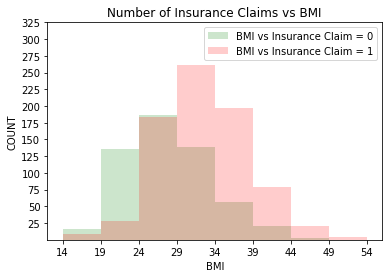

In [11]:
import matplotlib.pyplot as plt1

plt1.hist(df0['bmi'], bins=8, range=(14, 54), histtype='stepfilled',
         align='mid', color='g', label='BMI vs Insurance Claim = 0', alpha=0.2)
plt1.hist(df1['bmi'], bins=8, range=(14, 54), histtype='stepfilled',
         align='mid', color='r', label='BMI vs Insurance Claim = 1', alpha=0.2)

plt1.legend()
plt1.xlabel('BMI')
plt1.ylabel('COUNT')
plt1.xticks(range(14,55,5))
plt1.yticks(range(25,350,25))
plt1.title('Number of Insurance Claims vs BMI')
plt1.show()

People who has BMI around 15-24 are less likely to file insurance claims.

People who has BMI around 25-29 are neutral.

People who has BMI above 29 are most likely to file insurace claims.

### Numbers of insurance claims vs Age and BMI

In [12]:
df = df_table.groupby(['age_bins','bmi_bins','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df) #need visualization to see the trend

    age_bins  bmi_bins  insuranceclaim  Count
0   (10, 19]  (14, 19]               0      3
1   (10, 19]  (14, 19]               1      2
2   (10, 19]  (19, 24]               0     19
3   (10, 19]  (19, 24]               1      3
4   (10, 19]  (24, 29]               0     19
5   (10, 19]  (24, 29]               1     17
6   (10, 19]  (29, 34]               0      6
7   (10, 19]  (29, 34]               1     31
8   (10, 19]  (34, 39]               0      3
9   (10, 19]  (34, 39]               1     21
10  (10, 19]  (39, 44]               0      1
11  (10, 19]  (39, 44]               1     10
12  (10, 19]  (44, 49]               1      1
13  (10, 19]  (49, 54]               1      1
14  (19, 29]  (14, 19]               0      5
15  (19, 29]  (14, 19]               1      4
16  (19, 29]  (19, 24]               0     36
17  (19, 29]  (19, 24]               1      7
18  (19, 29]  (24, 29]               0     38
19  (19, 29]  (24, 29]               1     37
20  (19, 29]  (29, 34]            

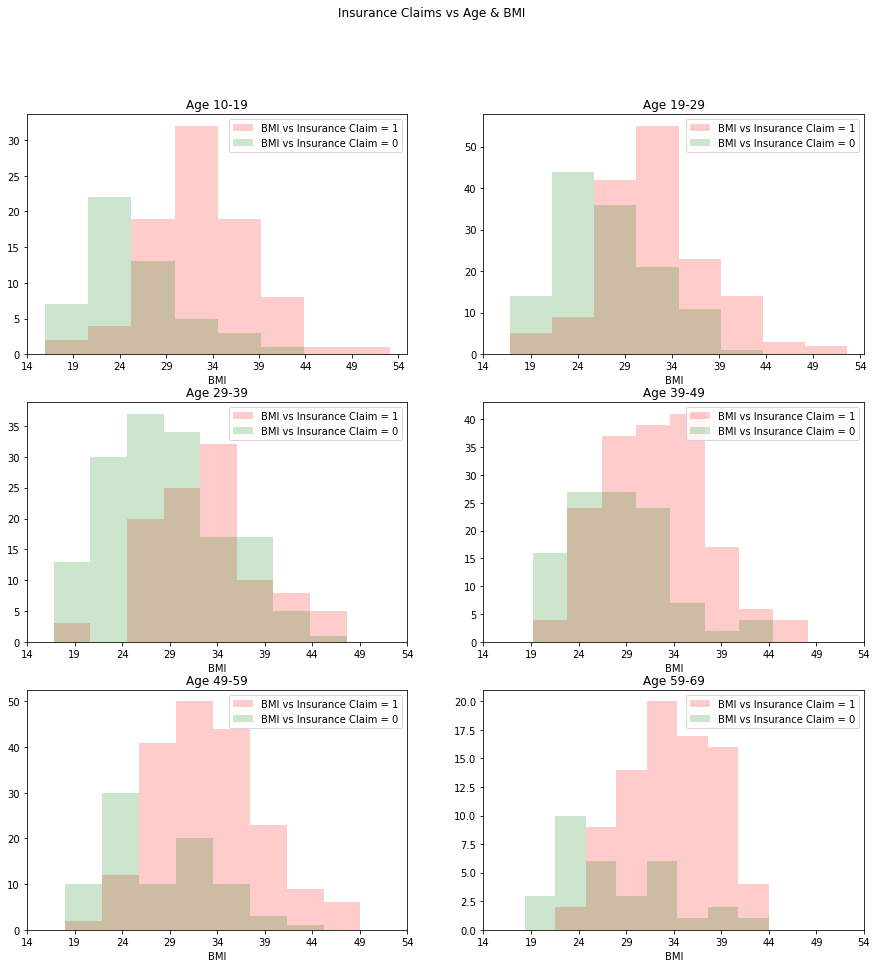

In [13]:
import matplotlib.pyplot as plt2
fig, axs = plt2.subplots(3, 2, tight_layout=False, figsize=(15,15))
df2 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['age']>10) & (df_table['age']<=19)]
df3 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['age']>10) & (df_table['age']<=19)]
axs[0,0].hist([df2['bmi'],df3['bmi']], bins=8, histtype='stepfilled',
         align='mid', color=['g','r'], label=['BMI vs Insurance Claim = 0','BMI vs Insurance Claim = 1'], alpha=0.2)

df4 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['age']>19) & (df_table['age']<=29)]
df5 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['age']>19) & (df_table['age']<=29)]
axs[0,1].hist([df4['bmi'],df5['bmi']], bins=8, histtype='stepfilled',
         align='mid', color=['g','r'], label=['BMI vs Insurance Claim = 0','BMI vs Insurance Claim = 1'], alpha=0.2)

df6 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['age']>29) & (df_table['age']<=39)]
df7 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['age']>29) & (df_table['age']<=39)]
axs[1,0].hist([df6['bmi'],df7['bmi']], bins=8, histtype='stepfilled',
         align='mid', color=['g','r'], label=['BMI vs Insurance Claim = 0','BMI vs Insurance Claim = 1'], alpha=0.2)

df8 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['age']>39) & (df_table['age']<=49)]
df9 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['age']>39) & (df_table['age']<=49)]
axs[1,1].hist([df8['bmi'],df9['bmi']], bins=8, histtype='stepfilled',
         align='mid', color=['g','r'], label=['BMI vs Insurance Claim = 0','BMI vs Insurance Claim = 1'], alpha=0.2)

df10 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['age']>49) & (df_table['age']<=59)]
df11 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['age']>49) & (df_table['age']<=59)]
axs[2,0].hist([df10['bmi'],df11['bmi']], bins=8, histtype='stepfilled',
         align='mid', color=['g','r'], label=['BMI vs Insurance Claim = 0','BMI vs Insurance Claim = 1'], alpha=0.2)

df12 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['age']>59) & (df_table['age']<=69)]
df13 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['age']>59) & (df_table['age']<=69)]
axs[2,1].hist([df12['bmi'],df13['bmi']], bins=8, histtype='stepfilled',
         align='mid', color=['g','r'], label=['BMI vs Insurance Claim = 0','BMI vs Insurance Claim = 1'], alpha=0.2)

for i in range(3):
    for j in range(2):
        axs[i,j].legend()
        axs[i,j].set(xlabel='BMI')
        plt2.sca(axs[i,j])
        plt2.xticks(range(14,55,5))

axs[0,0].set_title('Age 10-19')
axs[0,1].set_title('Age 19-29')
axs[1,0].set_title('Age 29-39')
axs[1,1].set_title('Age 39-49')
axs[2,0].set_title('Age 49-59')
axs[2,1].set_title('Age 59-69')

fig.suptitle('Insurance Claims vs Age & BMI')
plt2.show()

### Number of insurance claims for smokers vs nonsmokers

In [14]:
df = df_table.groupby(['smoker','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df)

   smoker  insuranceclaim  Count
0       0               0    530
1       0               1    534
2       1               0     25
3       1               1    249


Nonsmokers are neutral regarding claims.

Smokers tends to file insurance claims.

### Number of insurance claims vs amount getting charge

In [15]:
df_table['charges_bins'] = pd.cut(x=df_table['charges'], bins=[1000, 4999, 9999, 14999, 19999, 24999, 29999,34999,39999,44999,49999,54999,59999,64999,69999,74999])

df = df_table.groupby(['charges_bins','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df)

      charges_bins  insuranceclaim  Count
0     (1000, 4999]               0    182
1     (1000, 4999]               1    177
2     (4999, 9999]               0    199
3     (4999, 9999]               1    154
4    (9999, 14999]               0     99
5    (9999, 14999]               1    169
6   (14999, 19999]               0     34
7   (14999, 19999]               1     51
8   (19999, 24999]               0     20
9   (19999, 24999]               1     52
10  (24999, 29999]               0     14
11  (24999, 29999]               1     25
12  (29999, 34999]               0      4
13  (29999, 34999]               1     25
14  (34999, 39999]               0      3
15  (34999, 39999]               1     51
16  (39999, 44999]               1     41
17  (44999, 49999]               1     31
18  (49999, 54999]               1      2
19  (54999, 59999]               1      2
20  (59999, 64999]               1      3


People who have to pay around \\$1000 - \\$10,000 are less likely to file insurance claims.

People who have to pay \\$35,000+ are 100% will file insurance claim.

### Number of insurance claims for each gender who is either smoker/non-smoker


In [16]:
df = df_table.groupby(['sex','smoker','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df)

   sex  smoker  insuranceclaim  Count
0    0       0               0    273
1    0       0               1    274
2    0       1               0     12
3    0       1               1    103
4    1       0               0    257
5    1       0               1    260
6    1       1               0     13
7    1       1               1    146


Female or Male who is not a smoker are neutral. 

Female or Male who is a smoker are likely to claim.

### Number of insurance claims based on age groups and smoker/non smoker

In [17]:
df = df_table.groupby(['age_bins','smoker','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df)

    age_bins  smoker  insuranceclaim  Count
0   (10, 19]       0               0     49
1   (10, 19]       0               1     58
2   (10, 19]       1               0      2
3   (10, 19]       1               1     28
4   (19, 29]       0               0    121
5   (19, 29]       0               1    103
6   (19, 29]       1               0      6
7   (19, 29]       1               1     50
8   (29, 39]       0               0    140
9   (29, 39]       0               1     59
10  (29, 39]       1               0     14
11  (29, 39]       1               1     44
12  (39, 49]       0               0    104
13  (39, 49]       0               1    113
14  (39, 49]       1               0      3
15  (39, 49]       1               1     59
16  (49, 59]       0               0     84
17  (49, 59]       0               1    146
18  (49, 59]       1               1     41
19  (59, 69]       0               0     32
20  (59, 69]       0               1     55
21  (59, 69]       1            

Based on the result, people between 30-49 and not a smoker are likely to not file claim (line8) while people between 50-59 and not a smoker are likely to file claim (line 17).

Seem like regarding smoking or not, they will likely to file claim. Therefore, the feature for smokers might not really determine the claim. 

### Number of insurance claims each region

In [18]:
df = df_table.groupby(['isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df)

   isNorthEast  isNorthWest  isSouthEast  isSouthWest  insuranceclaim  Count
0            0            0            0            1               0    142
1            0            0            0            1               1    183
2            0            0            1            0               0    119
3            0            0            1            0               1    245
4            0            1            0            0               0    162
5            0            1            0            0               1    163
6            1            0            0            0               0    132
7            1            0            0            0               1    192


No much difference between claiming or not claiming in each region as they are around 50% that claims and 50% that don't.

### Number of insurance claims vs the charged amounts in each region

In [19]:
df_table['charges_bins'] = pd.cut(x=df_table['charges'], bins=[1000, 4999, 9999, 14999, 19999, 24999, 29999,34999,39999,44999,49999,54999,59999,64999,69999,74999])
df = df_table.groupby(['isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest','charges_bins','insuranceclaim'], sort=True).size().reset_index(name='Count')
print (df) #need visualization to see the trend

    isNorthEast  isNorthWest  isSouthEast  isSouthWest    charges_bins  \
0             0            0            0            1    (1000, 4999]   
1             0            0            0            1    (1000, 4999]   
2             0            0            0            1    (4999, 9999]   
3             0            0            0            1    (4999, 9999]   
4             0            0            0            1   (9999, 14999]   
5             0            0            0            1   (9999, 14999]   
6             0            0            0            1  (14999, 19999]   
7             0            0            0            1  (14999, 19999]   
8             0            0            0            1  (19999, 24999]   
9             0            0            0            1  (19999, 24999]   
10            0            0            0            1  (24999, 29999]   
11            0            0            0            1  (24999, 29999]   
12            0            0          

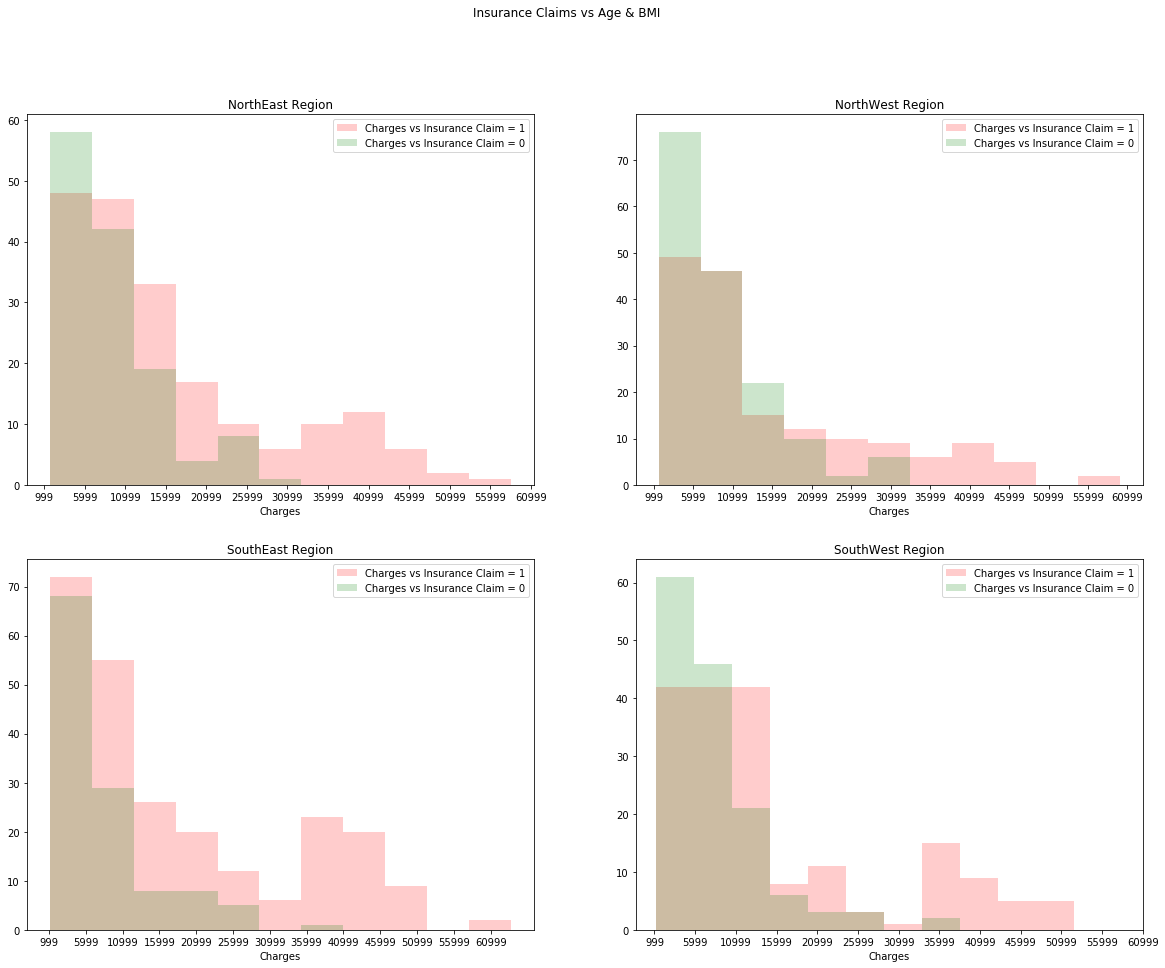

In [20]:
import matplotlib.pyplot as plt3
fig, axs = plt3.subplots(2, 2, tight_layout=False, figsize=(20,15))
df14 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['isNorthEast']==1)]
df15 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['isNorthEast']==1)]
axs[0,0].hist([df14['charges'],df15['charges']], bins=11, histtype='stepfilled',
         align='mid', color=['g','r'], label=['Charges vs Insurance Claim = 0','Charges vs Insurance Claim = 1'], alpha=0.2)

df16 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['isNorthWest']==1)]
df17 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['isNorthWest']==1)]
axs[0,1].hist([df16['charges'],df17['charges']], bins=11, histtype='stepfilled',
         align='mid', color=['g','r'], label=['Charges vs Insurance Claim = 0','Charges vs Insurance Claim = 1'], alpha=0.2)

df18 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['isSouthEast']==1)]
df19 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['isSouthEast']==1)]
axs[1,0].hist([df18['charges'],df19['charges']], bins=11, histtype='stepfilled',
         align='mid', color=['g','r'], label=['Charges vs Insurance Claim = 0','Charges vs Insurance Claim = 1'], alpha=0.2)

df20 = df_table[(df_table['insuranceclaim'] == 0) & (df_table['isSouthWest']==1)]
df21 = df_table[(df_table['insuranceclaim'] == 1) & (df_table['isSouthWest']==1)]
axs[1,1].hist([df20['charges'],df21['charges']], bins=11, histtype='stepfilled',
         align='mid', color=['g','r'], label=['Charges vs Insurance Claim = 0','Charges vs Insurance Claim = 1'], alpha=0.2)

for i in range(2):
    for j in range(2):
        axs[i,j].legend()
        axs[i,j].set(xlabel='Charges')
        plt2.sca(axs[i,j])
        plt2.xticks(range(999,64999,5000))

axs[0,0].set_title('NorthEast Region')
axs[0,1].set_title('NorthWest Region')
axs[1,0].set_title('SouthEast Region')
axs[1,1].set_title('SouthWest Region')

fig.suptitle('Insurance Claims vs Age & BMI')
plt3.show()

# 5. Predictive Models

##### WE DECIDED TO USE RANDOM FOREST AND MULTINOMIAL LOGISTIC REGRESSION TO CLASSIFY INSURANCE CLAIM

In [21]:
#Split data frame into two data frame for Random Forest and MULTINOMIAL LOGISTIC Regression
rf_df = df_table[:int(len(df_table.index)/2)]
mlg_df = df_table[int(len(df_table.index)/2):]
mlg_df = mlg_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest','insuranceclaim']]

## A. Multinomial Logistic Regression

   ### Create Training Set and Testing Set

In [22]:
#Import packages for MULTINOMIAL Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from pandas import Series, DataFrame

#Create Training set and Testing set for MULTINOMIAL logistic Regression
y_mlg = mlg_df['insuranceclaim']
x_train_mlg, x_test_mlg, y_train_mlg, y_test_mlg = train_test_split(mlg_df, y_mlg, test_size=0.20)

In [23]:
#Check Size
mlg_size = Series([len(x_train_mlg),len(y_train_mlg),len(x_test_mlg),len(y_test_mlg)], index = ['X Training','Y Training','X Test','Y Test'])
mlg_size              

X Training    535
Y Training    535
X Test        134
Y Test        134
dtype: int64

### Features Selection for Multinomial Logistic Regression with RFE

In [24]:
# Import package for feature selections
from __future__ import division  #will change the / operator to mean true division throughout the module.
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Get Series of reponse and variables
y = mlg_df['insuranceclaim']
x = mlg_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest']]

#Create lists of metric and informational values 
precision =[]
recall = []
currate = []
correct = []
total = []
findex = []
feature = []
K_Fold = []

#Declare type of model for RFE to evaluate
logreg = LogisticRegression()

#Loop through each number of variables to run RFE
for i in range(1, len(mlg_df.columns)):
    rfe = RFE(logreg, i, step = 1)
    rfe = rfe.fit(x, y)
    
    #Zip variables and choice indication of features 
    choices = dict(zip(x,rfe.support_))
    cols = []
    
    #Save features chosen by RFE based on coefficient and feature important score
    for var in choices:
        if choices[var] == True:
            cols.append(var)
            
    #Rebuild training and testing set based on number of chosen variables
    x_ftrain_mlg = x_train_mlg[cols]
    x_ftest_mlg = x_test_mlg[cols]
    mlg_model = LogisticRegression()
    
    #Find best cv for current amount of feature 
    meancv = {3:0,5:0,10:0,20:0,50:0}
    maxdictindex = 0
    maxdictvalue = 0
    for j in (3,5,10,20,50):
        x_cv = x_ftrain_mlg.to_numpy()   ##instead of .as_matrix() using .to_numpy() to remove the future warning
        y_cv = y_train_mlg.to_numpy()    ##instead of .as_matrix() using .to_numpy() to remove the future warning
        cv_score = cross_val_score(mlg_model,x_cv,y_cv, cv = j)
        meancv[j] = np.mean(cv_score)
        if meancv[j] > maxdictvalue:
            maxdictindex = j
            maxdictvalue = meancv[j]
    
    # Train Multinomial Logistic Regression with best cross validation to create a model
    mlg_model_cv = LogisticRegressionCV(cv=maxdictindex, solver='lbfgs', random_state=0,multi_class='multinomial')  ##specified solver='lbfgs' to remove the future warning. 'lbfgs' is the default value of solver as well.  
    mlg_fit = mlg_model_cv.fit(x_ftrain_mlg, y_train_mlg)

    #Use Model to test the testing data set
    y_pred_mlg= mlg_model_cv.predict(x_ftest_mlg)
    
    #Calculate Classification Rate/Accuracy of MULTINOMIAL Logistic Regression
    accurate = accuracy_score(y_test_mlg, y_pred_mlg, normalize=False) 
    rate = accurate / len(y_test_mlg)
    p_score = precision_score(y_test_mlg, y_pred_mlg)
    r_score = recall_score(y_test_mlg, y_pred_mlg)
    #Add values for the result dataframe
    currate.append(rate)
    findex.append(i)
    total.append(len(y_test_mlg))
    correct.append(accurate)
    feature.append(cols)
    K_Fold.append(maxdictindex)
    precision.append(p_score)
    recall.append(r_score)

//anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Choose Best Number of Features for Multinomial Logistic Regression

In [25]:
#Create DataFrame for RFE result
dictresult = {'Accurate Predict': correct, 'Total' : total, 'Rate' : currate,'Number of Features':findex, 'Feature' : feature, 'K-Fold':K_Fold, 'Precision':precision, 'Recall':recall }    
rferesult = DataFrame(dictresult, index = findex)

#Rearrange columns
rferesult = rferesult[['Number of Features','Precision','Recall','Rate','Accurate Predict','Total','Feature','K-Fold']]

In [26]:
#Sort by highest prediction accuracy
rferesult = rferesult.sort_values("Recall", ascending = False)
rferesult

,Number of Features,Precision,Recall,Rate,Accurate Predict,Total,Feature,K-Fold
8,8,0.863014,0.900000,0.873134,117,134,"[isSouthEast, isSouthWest, bmi, smoker, sex, i...",10
9,9,0.851351,0.900000,0.865672,116,134,"[isSouthEast, isSouthWest, age, bmi, smoker, s...",10
10,10,0.863014,0.900000,0.873134,117,134,"[isSouthEast, isSouthWest, charges, age, bmi, ...",3
3,3,0.737500,0.842857,0.761194,102,134,"[isSouthEast, smoker, children]",10
4,4,0.737500,0.842857,0.761194,102,134,"[isSouthEast, smoker, isNorthWest, children]",10
5,5,0.737500,0.842857,0.761194,102,134,"[isSouthEast, smoker, sex, isNorthWest, children]",10
6,6,0.737500,0.842857,0.761194,102,134,"[isSouthEast, smoker, sex, isNorthEast, isNort...",10
7,7,0.737500,0.842857,0.761194,102,134,"[isSouthEast, isSouthWest, smoker, sex, isNort...",10
2,2,0.739726,0.771429,0.738806,99,134,"[smoker, children]",10
1,1,0.862069,0.357143,0.634328,85,134,[smoker],3


In [40]:
rferesult[:1]

,Number of Features,Precision,Recall,Rate,Accurate Predict,Total,Feature,K-Fold
8,8,0.863014,0.9,0.873134,117,134,"[isSouthEast, isSouthWest, bmi, smoker, sex, i...",10


In [42]:
arr = np.array(rferesult[:1]['Feature'])
arr

array([list(['isSouthEast', 'isSouthWest', 'bmi', 'smoker', 'sex', 'isNorthEast', 'isNorthWest', 'children'])],
      dtype=object)

## B. Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
rf_df = rf_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest','insuranceclaim']]


### Split 70% Training and 30% Testing

In [31]:
Features = rf_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','isNorthEast', 'isNorthWest', 'isSouthEast','isSouthWest']] 
Label = rf_df['insuranceclaim']

X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.3)

print("Training features:", len(X_train))
print("Training label:", len(y_train))
print("Test features:", len(X_test))
print("Test label:", len(y_test))


('Training features:', 468)
('Training label:', 468)
('Test features:', 201)
('Test label:', 201)


### Generate Random Forest Classifier

In [32]:
clf=RandomForestClassifier(n_estimators=100, random_state = 0) #n_estimators = number of random decision trees

#Train the model 
clf.fit(X_train,y_train)

#Prediction on test set
y_pred=clf.predict(X_test)

### Display Important Features

In [33]:
feature_imp = pd.Series(clf.feature_importances_,index=Features.columns).sort_values(ascending=False)
feature_imp

bmi            0.328468
children       0.255871
charges        0.175475
age            0.108587
smoker         0.076384
sex            0.015988
isNorthWest    0.012349
isSouthEast    0.010663
isSouthWest    0.008293
isNorthEast    0.007923
dtype: float64

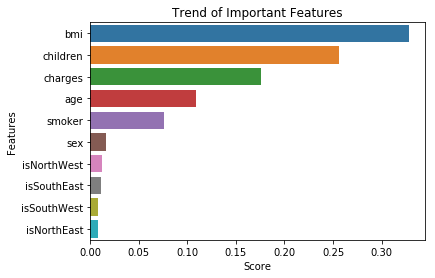

In [34]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Trend of Important Features")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

### Confusion Matrix

In [35]:
pd.crosstab(y_test,y_pred, rownames = ['Actual Claims'], colnames = ['Predicted Claims'], margins=True, margins_name = "Total")

Predicted Claims,0,1,Total
Actual Claims,,,
0,75,8,83
1,8,110,118
Total,83,118,201


In [36]:
cm = np.zeros((len(y_test), len(y_pred)))
for a, p in zip(y_test,y_pred):
    cm[a][p] += 1


truePositive = cm[0][0]
falsePositive = cm[0][1]
falseNegative = cm[1][0]
trueNegative = cm[1][1]
precision = truePositive / (truePositive + falsePositive)
recall = truePositive / (truePositive + falseNegative)
accuracy = (y_test == y_pred).sum() / float(len(y_test))

print("Precision =", precision)
print("Recall =", recall)
print("F1 score =", 2*precision*recall / (precision+recall))
print("Accuracy= ",accuracy)

('Precision =', 0.9036144578313253)
('Recall =', 0.9036144578313253)
('F1 score =', 0.9036144578313253)
('Accuracy= ', 0.9203980099502488)


### Select: 'bmi', 'children', 'charges', 'age', 'smoker', 'sex'

In [37]:
new_Features2 = rf_df[['bmi', 'children', 'charges', 'age', 'smoker', 'sex']] #Getting BMI, Children, Charges, Age, Smoker

F_train, F_test, L_train, L_test = train_test_split(new_Features2, Label, test_size=0.3)

print("Training features:", len(F_train))
print("Training label:", len(L_train))
print("Test features:", len(F_test))
print("Test label:", len(L_test))

#Train the model 
clf.fit(F_train,L_train)

#Prediction on test set
L_pred=clf.predict(F_test)

cm = np.zeros((len(L_test), len(L_pred)))
for a, p in zip(L_test,L_pred):
    cm[a][p] += 1

truePositive = cm[0][0]
falsePositive = cm[0][1]
falseNegative = cm[1][0]
trueNegative = cm[1][1]
precision = truePositive / (truePositive + falsePositive)
recall = truePositive / (truePositive + falseNegative)
accuracy = (L_test == L_pred).sum() / float(len(L_test))

print("Precision =", precision)
print("Recall =", recall)
print("F1 score =", 2*precision*recall / (precision+recall))
print("Accuracy= ",accuracy)

pd.crosstab(L_test,L_pred, rownames = ['Actual Claims'], colnames = ['Predicted Claims'], margins=True, margins_name = "Total")


('Training features:', 468)
('Training label:', 468)
('Test features:', 201)
('Test label:', 201)
('Precision =', 0.9577464788732394)
('Recall =', 0.85)
('F1 score =', 0.9006622516556291)
('Accuracy= ', 0.9253731343283582)


Predicted Claims,0,1,Total
Actual Claims,,,
0,68,3,71
1,12,118,130
Total,80,121,201


### Select Important Features: 'bmi', 'children', 'charges', 'age', 'smoker'

#### Split 70% Training and 30% Testing

In [38]:
new_Features = rf_df[['bmi', 'children', 'charges', 'age', 'smoker']] #Getting BMI, Children, Charges, Age, Smoker

Features_train, Features_test, Label_train, Label_test = train_test_split(new_Features, Label, test_size=0.3)

print("Training features:", len(Features_train))
print("Training label:", len(Label_train))
print("Test features:", len(Features_test))
print("Test label:", len(Label_test))


#Train the model 
clf.fit(Features_train,Label_train)

#Prediction on test set
Label_pred=clf.predict(Features_test)

cm = np.zeros((len(Label_test), len(Label_pred)))
for a, p in zip(Label_test,Label_pred):
    cm[a][p] += 1

truePositive = cm[0][0]
falsePositive = cm[0][1]
falseNegative = cm[1][0]
trueNegative = cm[1][1]
precision = truePositive / (truePositive + falsePositive)
recall = truePositive / (truePositive + falseNegative)
accuracy = (Label_test == Label_pred).sum() / float(len(Label_test))

print("Precision =", precision)
print("Recall =", recall)
print("F1 score =", 2*precision*recall / (precision+recall))
print("Accuracy= ",accuracy)

pd.crosstab(Label_test,Label_pred, rownames = ['Actual Claims'], colnames = ['Predicted Claims'], margins=True, margins_name = "Total")

('Training features:', 468)
('Training label:', 468)
('Test features:', 201)
('Test label:', 201)
('Precision =', 0.8902439024390244)
('Recall =', 0.8588235294117647)
('F1 score =', 0.874251497005988)
('Accuracy= ', 0.8955223880597015)


Predicted Claims,0,1,Total
Actual Claims,,,
0,73,9,82
1,12,107,119
Total,85,116,201
